Brandon O'Neill<br>
CSPB 3202<br>
August 10, 2020<br>
Final Project<br>

# Project Overview

For my project, I decided to try and build an RL model for the mountain car environment. This was done using Python 3, Ptan, and gym. The mountain car problem is one where a car must accelerate to the left or right in order to gain enough momentum to get to the top of the hill. Below you will see an example of this.

In [2]:
import ptan
import gym
import numpy as np
from gym import wrappers

## Example Problem
Here you can see the environment with a fully random policy. The car is unable to make any progress up the hill at this point.

In [6]:
from IPython.display import Video

Video("car.mp4")

In [2]:

env = gym.make("MountainCar-v0")
observation = env.reset()
for _ in range(1000):
  env.render()
  action = env.action_space.sample() # your agent here (this takes random actions)
  observation, reward, done, info = env.step(action)

  if done:
    observation = env.reset()
env.close()

# The Mountain Climbing Probem   
   
   ### Environment:
    Actions:
         Accelerate to the Left
         Don't accelerate
         Accelerate to the Right
    Reward:
         Reward of 0 is awarded if the agent reached the flag (position = 0.5)
         on top of the mountain.
         Reward of -1 is awarded if the position of the agent is less than 0.5.
    Starting State:
         The position of the car is assigned a uniform random value in
         [-0.6 , -0.4].
         The starting velocity of the car is always assigned to 0.
    Episode Termination:
         The car position is more than 0.5
         Episode length is greater than 200

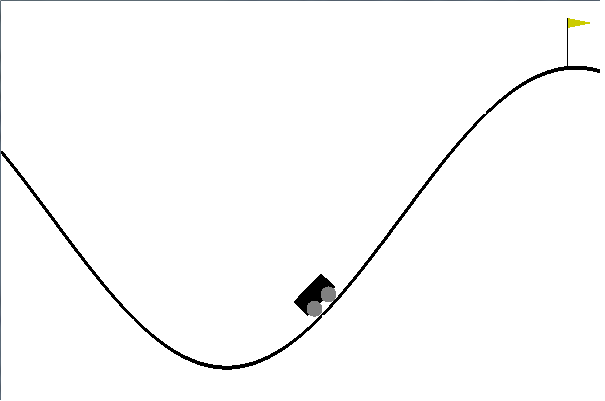

## Approach:
I decided to use Deep Q Learning to solve this problem. QLearning is a model free reinforcement learning technique that can be used to find the optimal action selection policy using Q function without requiring a model of the environment. Q-learning eventually finds an optimal policy. I used a number of variables sourced from other QLearning models and implemented the structure that iterates 5000 times. At the completion of these iterations, the optimal policy will be returned. This optimal policy can then be used in the gym environment to run the car up the mountain.

In [4]:
totStates = 40 
totIterations = 5000
learningRate = 1.0
minLearningRate = 0.005
maxStep = 10000

# parameters for q learning
epsilon = 0.05
gamma = 1.0

def simulation(environment, policy, render=False):
    observation= environment.reset()
    reward = 0
    count = 0
    for _ in range(maxStep):
        p,v = obs(environment, observation)
        action = policy[p][v]
        if render:
            environment.render()
        observation, reward, done, _ = environment.step(action)
        reward += gamma ** count * reward
        count += 1
        if done:
            break
    return reward


def obs(environment, observation):
    low = environment.observation_space.low
    high = environment.observation_space.high
    dx = (high - low) / totStates
    p = int((observation[0] - low[0])/dx[0])
    v = int((observation[1] - low[1])/dx[1])
    
    return p, v


environment = gym.make('MountainCar-v0')
environment.seed(0)
np.random.seed(0)

qTable = np.zeros((totStates, totStates, 3))

for i in range(totIterations):
    observation = environment.reset()
    totReward = 0
    eta = max(minLearningRate, learningRate * (0.85 ** (i//100)))

    for j in range(maxStep):
        p, v = obs(environment, observation)

        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(environment.action_space.n)
        else:
            logits = qTable[p][v]
            logits_exp = np.exp(logits)
            probabilities = logits_exp / np.sum(logits_exp)
            action = np.random.choice(environment.action_space.n, p=probabilities)
            observation, reward, done, _ = environment.step(action)

        totReward += reward
        p_, v_ = obs(environment, observation)
        qTable[p][v][action] = qTable[p][v][action] + eta * (reward + gamma *  np.max(qTable[p_][v_]) - qTable[p][v][action])
        if done:
            break
    if i % 50 == 0:
        print('Iteration No: %d -- Total Reward : %d.' %(i+1, totReward))

solution_policy = np.argmax(qTable, axis=2)
solution_policy_scores = [simulation(environment, solution_policy, False) for _ in range(100)]
print("Mean score : ", np.mean(solution_policy_scores))
simulation(environment, solution_policy, True)

Iteration No: 1 -- Total Reward : -210.
Iteration No: 51 -- Total Reward : -212.
Iteration No: 101 -- Total Reward : -208.
Iteration No: 151 -- Total Reward : -207.
Iteration No: 201 -- Total Reward : -206.
Iteration No: 251 -- Total Reward : -213.
Iteration No: 301 -- Total Reward : -1.
Iteration No: 351 -- Total Reward : -210.
Iteration No: 401 -- Total Reward : -213.
Iteration No: 451 -- Total Reward : -210.
Iteration No: 501 -- Total Reward : -211.
Iteration No: 551 -- Total Reward : -213.
Iteration No: 601 -- Total Reward : -208.
Iteration No: 651 -- Total Reward : -209.
Iteration No: 701 -- Total Reward : -215.
Iteration No: 751 -- Total Reward : -211.
Iteration No: 801 -- Total Reward : -210.
Iteration No: 851 -- Total Reward : -205.
Iteration No: 901 -- Total Reward : -1.
Iteration No: 951 -- Total Reward : -207.
Iteration No: 1001 -- Total Reward : -218.
Iteration No: 1051 -- Total Reward : -212.
Iteration No: 1101 -- Total Reward : -209.
Iteration No: 1151 -- Total Reward : -

-2.0

## Video Demonstration of Solution Policy Solving the Problem
As seen in the simulation below, the car is now able to successfully climb the hill in an efficient manner. With the optimal policy now on display.

In [4]:
episode_simulation(environment, solution_policy, True)

-118.0

# Results & Conclusion
The QLearning worked perfectly to solve the gym environment. The car is able to successfully climb up the hill. I learned a lot in this project about how to develop a policy and intergrate it with the already built environments using gym. This course has given me the tools to successfully develop little AI projects. In the future, I would love to implement more complex projects using less already built applications.

# References

https://gym.openai.com/envs/MountainCar-v0/ <br>
https://github.com/openai/baselines/<br>
https://github.com/Shmuma/ptan/blob/master/docs/intro.ipynb<br>
https://github.com/omerbsezer/Qlearning_MountainCar<br>